In [1]:
#Клюшніченко Дарина
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('diabetes.csv')

In [3]:
diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

df['target'] = diabetes.target

df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:

print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [9]:

print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [11]:
duplicates = df.duplicated().sum()
print(f'Кількість дублікатів: {duplicates}')

if duplicates > 0:
    df = df.drop_duplicates()

Кількість дублікатів: 0


In [13]:
print(df['стать'].unique())

df['стать'] = df['стать'].replace({'Male': 1, 'Female': 0})

KeyError: 'стать'

In [15]:
print(df.dtypes)

df = df.apply(pd.to_numeric, errors='coerce')

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


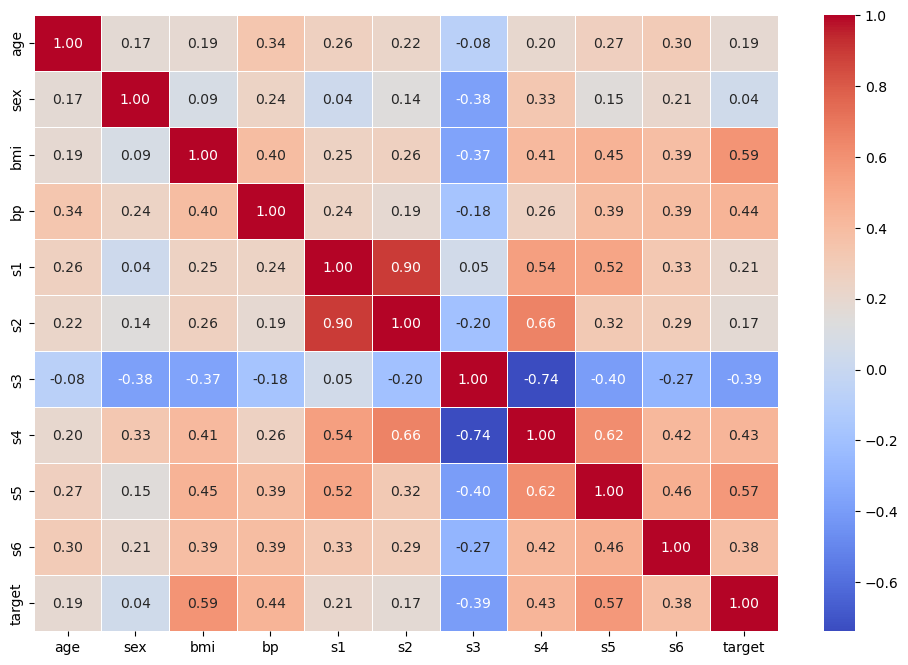

In [17]:
correlation = df.corr()['target'].sort_values(ascending=False)  # target – це цільова змінна
print(correlation)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [19]:
X = df.drop('target', axis=1)  # Усі ознаки, крім цільової
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [25]:
print("Лінійна регресія:")
print(f"R^2: {r2_score(y_test, y_pred_lin):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lin, squared=False):.2f}")

print("RandomForest регресія:")
print(f"R^2: {r2_score(y_test, y_pred_rf):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False):.2f}")

Лінійна регресія:
R^2: 0.45
RMSE: 53.85
RandomForest регресія:
R^2: 0.44
RMSE: 54.43


C:\Users\Yuppd_\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Yuppd_\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


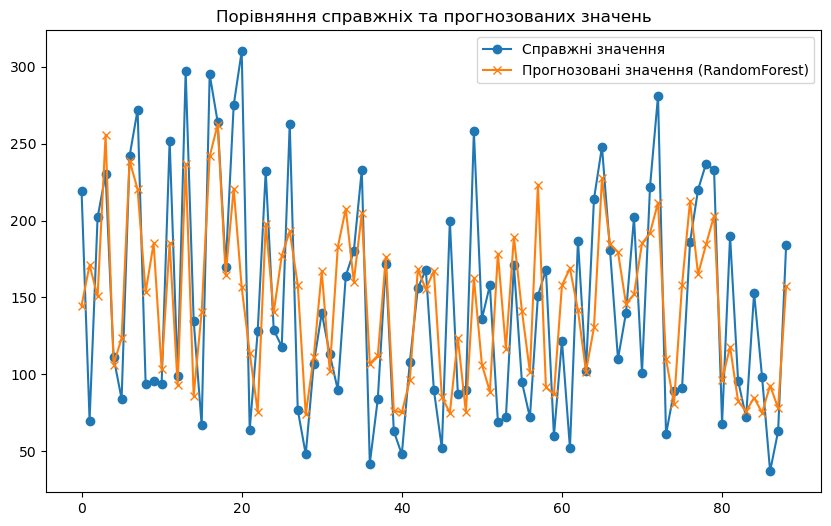

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Справжні значення', marker='o')
plt.plot(y_pred_rf, label='Прогнозовані значення (RandomForest)', marker='x')
plt.title('Порівняння справжніх та прогнозованих значень')
plt.legend()
plt.show()

In [29]:
results = pd.DataFrame({'Справжні значення': y_test, 'Прогнозовані значення (RF)': y_pred_rf})
print(results.head(10))

     Справжні значення  Прогнозовані значення (RF)
287              219.0                      144.66
211               70.0                      171.05
72               202.0                      150.62
321              230.0                      255.36
73               111.0                      106.39
418               84.0                      123.51
367              242.0                      238.99
354              272.0                      220.16
281               94.0                      153.44
148               96.0                      185.15


In [ ]:
#Висновок: цей код охоплює весь запит, включаючи попередній аналіз даних,побудову моделей та оцінку їхньої ефективності. 
